# Guided Project: Predicting Bike Rentals 

## Introduction to the Data Set

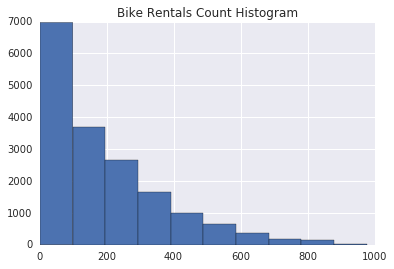

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

bike_rentals = pd.read_csv('bike_rental_hour.csv', parse_dates = True)
bike_rentals.head() 
plt.hist(bike_rentals['cnt'])
plt.title('Bike Rentals Count Histogram')
plt.show()
bike_rentals.corr()['cnt']


## Calculating Features 

For this step, I will calculate features before applying machine learning models. The features in a model can enhance the accuracy by showing new information or keeping information that is beneficial for the model. 

In [2]:
def assign_label(hour):
    if (hour >= 6) & (hour <=12):
        return 1
    elif (hour >=12) & (hour <= 18):
        return 2
    elif (hour >= 18) & (hour <= 24):
        return 3
    else: 
        return 4 

bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

## Splitting the Data Into Train and Test Sets

Before a machine learning algorithm can be applied, I have to split the data into both training data and testing data. I will be able to train an algorithm on the training set and see the accuracy on how it learns on the new test set. If I train the algorithm on the training data and then see how it performs on the training data, it will be a low error due to overfitting. I will split the data based on an 80% training and 20% test set. Also, the metric that seems to make the most sense to use is the MSE metric since this is a numerical data set.

In [3]:
#Sample the bike_rentals data and set random_state = 1 for reproducibility
train = bike_rentals.sample(random_state = 1, frac = 0.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]


## Applying Linear Regression

After conducting exploration and manipulation, I will apply linear regression to the data set. I believe linear regression will work well with this data because I will be predicting continuous values for the price of bike rentals. Also, it will work well since the columns in the dataframe are highly correlated with the 'cnt' column. Linear Regression is an algorithm that works best when the predictors are linearly correlated to the target column and is also independent. Also, it's fairly resistant to overfitting but can have underfitting problems as well. 

In [4]:
columns = list(train.columns)
columns.remove('cnt')
columns.remove('casual')
columns.remove('dteday')
columns.remove('registered')

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[columns], train['cnt'])
predictions = lr.predict(test[columns])
np.mean((predictions - test['cnt'])**2)


16402.497093142552

## Applying Decision Trees

After creating the Linear Regression model and calculating the squared MSE, it's time to apply the decision tree algorithm. I will be able to compare the error with the error from linear regression which will enable me to choose the best algorithm for the data. Decision Trees predict outcomes much more reliably than linear regression models. However, due to the complexity of a decision tree, it also tends to overfit and are vulernable to instability. 

In [5]:
from sklearn.tree import DecisionTreeRegressor
#5 Leaves
clf = DecisionTreeRegressor(min_samples_leaf = 5)
clf.fit(train[columns], train['cnt'])
predictions = clf.predict(test[columns])
np.mean((predictions - test['cnt'])**2)


2737.4544687516936

In [6]:
#2 Leaves
clf = DecisionTreeRegressor(min_samples_leaf = 2)
clf.fit(train[columns], train['cnt'])
predictions = clf.predict(test[columns])
np.mean((predictions - test['cnt'])**2)


3007.5606380258278

## Applying Random Forests

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(min_samples_leaf = 5)
rf.fit(train[columns], train['cnt'])
predictions = rf.predict(test[columns])
np.mean((predictions - test['cnt'])**2)

2206.7471728137252

In [8]:
rf = RandomForestRegressor(min_samples_leaf = 2)
rf.fit(train[columns], train['cnt'])
predictions = rf.predict(test[columns])
np.mean((predictions - test['cnt'])**2)

1954.4105768685895